<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Machine Learning Model on FIFA 2018 Dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Random Forest Modelling](#section4)<br>
    - 4.1 [Advantages and Disadvantages](#section401)<br>
    - 4.2 [Splitting X and y into training and test datasets.](#section402)<br>
    - 4.3 [Random Forest in scikit-learn](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br>
6. [Random forest with RandomizedsearchCV](#section6)<br>
7. [Precision Case](#section7)<br>
    - 7.1 [Model Evaluation using precision score](#section701)<br>
    - 7.2 [Model Evaluation using Recall score](#section702)<br>
    - 7.3 [Model Evaluation using F1 score](#section703)<br>
    - 4.4 [Model Evaluation using ROC_AUC score](#section704)<br>

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict Man of the Match of the Team played in FIFA 2018__ using using this statistics before the official announcement.

<a id=section2></a>

### 2. Data Loading and Description

<a id=section201></a>

- The dataset consists of the information about the FIFA match happened in 2018. Various variables present in the dataset includes data of team, opponent team, goal, attempt man of the match etc. 
- The dataset comprises of __128 observations of 27 columns__. Below is a table showing names of all the columns and their description.

|Column                  |	Description                                                    |
|----------------------- | --------------------------------------------------------------- | 
| Date	  	             | Match Date                                                      |
| Team    	             | Playing Team                                                    |
| Opponent	             | Opponent Team                                                   |
| Goal Scored            | Number of goals scored by this team                             |
| Ball Possession %	     | Amount of time ball was in control by the team                  |
| Attempts      	     | Number of attempts to score goal                                |   
| On-Target              | Number of shots on-target                                       | 
| Off-Target             | Number of shots that went off-target                            |
| Blocked                | Number of opponent team's attempts blocked by the team          |
| Corners       	     | Number of corner shots used                                     | 
| Offsides      	     | Number of off-side events                                       |
| Free Kicks    	     | Number of free-kicks used                                       |
| Saves         	     | Number saves by the goal keeper                                 |
| Pass Accuracy %	     | Percentage of passes that reached the same team player as aimed |
| Passes        	     | Total number of passes by the team                              |
| Distance Covered (Kms) | Total distance covered by the team members in this game         |
| Fouls Committed        | Number of fouls committed by the team members                   |
| Yellow Card            | Number of Yellow warning received                               |
| Yellow & Red           | Number of Yellow & Red warning received                         |
| Red                    | Number of Red cards received                                    |
| Man of the Match     	 | Did this team member win Man of the Match?                      |
| 1st Goal               | When did the team score the 1st goal?                           |
| Round               	 | Stage of the match                                              |
| PSO                  	 | Was there a penalty shootout (PSO) in this match?               |
| Goals in PSO           | Number of goals scored in the Penalty shootout                  |
| Own goals              | Number of own goals                                             |
| Own goal Time          | When did the team score own goal?                               |

#### Importing packages                                          

In [32]:
import numpy as np                                                 # Implemennts multi-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

import warnings                                                    # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

#### Importing the Dataset

In [33]:
fifa_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv")     # Importing training dataset using pd.read_csv

In [34]:
fifa_data.head()

Date          Team      Opponent  Goal Scored  Ball Possession %  \
0  14-06-2018        Russia  Saudi Arabia            5                 40   
1  14-06-2018  Saudi Arabia        Russia            0                 60   
2  15-06-2018         Egypt       Uruguay            0                 43   
3  15-06-2018       Uruguay         Egypt            1                 57   
4  15-06-2018       Morocco          Iran            0                 64   

   Attempts  On-Target  Off-Target  Blocked  Corners      ...        \
0        13          7           3        3        6      ...         
1         6          0           3        3        2      ...         
2         8          3           3        2        0      ...         
3        14          4           6        4        5      ...         
4        13          3           6        4        5      ...         

   Yellow Card  Yellow & Red  Red  Man of the Match  1st Goal        Round  \
0            0             0    0               Yes      12.0  Group Stage   
1            0             0    0                No       NaN  Group Stage   
2            2             0    0                No       NaN  Group Stage   
3            0             0    0               Yes      89.0  Group Stage   
4            1             0    0                No       NaN  Group Stage   

   PSO  Goals in PSO  Own goals  Own goal Time  
0   No             0        NaN            NaN  
1   No             0        NaN            NaN  
2   No             0        NaN            NaN  
3   No             0        NaN            NaN  
4   No             0        1.0           90.0  

[5 rows x 27 columns]

In [35]:
fifa_data.shape

(128, 27)

In [36]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
Date                      128 non-null object
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-nul

In [37]:
fifa_data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping the column __'Own goal Time' & 'Own goals'__ as it has too many _null_ values.
    - Dropping other irrelevant columns which are either in string/number and not of use for the prediction
    - Converted __'Man of the Match'__ coulmn values to numeric values for better calculation.

In [38]:
fifa_data.drop(['Own goal Time', 'Own goals', 'Date', '1st Goal',  'Team','Opponent', 'Round' ,'Distance Covered (Kms)', 'PSO'], axis = 1,inplace = True)

In [39]:
fifa_data['Man of the Match'] = fifa_data.apply(lambda x: 1 if x['Man of the Match'] == 'Yes' else 0,axis=1)

In [40]:
fifa_data.head()

Goal Scored  Ball Possession %  Attempts  On-Target  Off-Target  Blocked  \
0            5                 40        13          7           3        3   
1            0                 60         6          0           3        3   
2            0                 43         8          3           3        2   
3            1                 57        14          4           6        4   
4            0                 64        13          3           6        4   

   Corners  Offsides  Free Kicks  Saves  Pass Accuracy %  Passes  \
0        6         3          11      0               78     306   
1        2         1          25      2               86     511   
2        0         1           7      3               78     395   
3        5         1          13      3               86     589   
4        5         0          14      2               86     433   

   Fouls Committed  Yellow Card  Yellow & Red  Red  Man of the Match  \
0               22            0             0    0                 1   
1               10            0             0    0                 0   
2               12            2             0    0                 0   
3                6            0             0    0                 1   
4               22            1             0    0                 0   

   Goals in PSO  
0             0  
1             0  
2             0  
3             0  
4             0

Text(0.5,1,'Correlation between features')

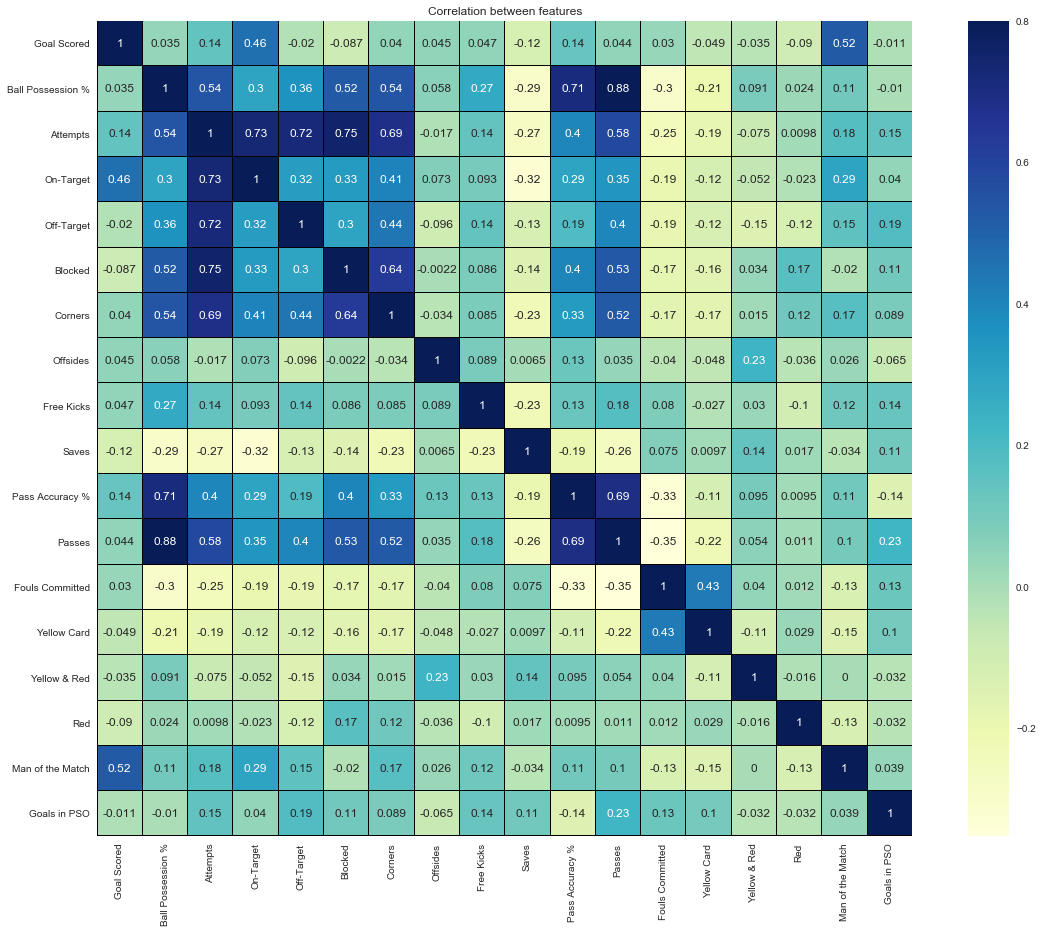

In [41]:
corr = fifa_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

__Observation__

- "Passes" and "Ball Possession %" are highest correlated. Also, "Ball Possession %" and "Pass Accuracy %" has high correlation. "Pass Accuracy %" and "Passes" has high correlation. i.e. the team which has high Ball Possession %, passes ball more with high accuracy.
- "Attempts" has high correlation with following columns: "Off-Target", "On-Target", "Blocked". Actually Attempts is the sum of these three features.
- Most of the attempts done from the corner. And, Most of the corners got blocked.
- The player whose team scored more goals in a match more likely got Man of the match.

__Model Selection__
- From above observations, We don't see much corrleation between the output(Man of the Match) and input(Rest of the columns). So, We are giving preference to Random Forest on top of Linear regression.

<a id = section4></a>

## 4. Random Forest Modelling

<a id = section401></a>

### 4.1 Preparing X and y using pandas

In [44]:
X = fifa_data.loc[:,fifa_data.columns != 'Man of the Match']
X.head()

Goal Scored  Ball Possession %  Attempts  On-Target  Off-Target  Blocked  \
0            5                 40        13          7           3        3   
1            0                 60         6          0           3        3   
2            0                 43         8          3           3        2   
3            1                 57        14          4           6        4   
4            0                 64        13          3           6        4   

   Corners  Offsides  Free Kicks  Saves  Pass Accuracy %  Passes  \
0        6         3          11      0               78     306   
1        2         1          25      2               86     511   
2        0         1           7      3               78     395   
3        5         1          13      3               86     589   
4        5         0          14      2               86     433   

   Fouls Committed  Yellow Card  Yellow & Red  Red  Goals in PSO  
0               22            0             0    0             0  
1               10            0             0    0             0  
2               12            2             0    0             0  
3                6            0             0    0             0  
4               22            1             0    0             0

In [45]:
y = fifa_data['Man of the Match']

<a id = section402></a>

### 4.2 Splitting X and y into training and test datasets.

In [46]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [47]:
print(X_train.shape)
print(y_train.shape)

(102, 17)
(102,)


<a id = section403></a>

### 4.3 Random Forest in scikit-learn

- __Model without parameter specification__

In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

- __Model with parameters specified__

In [49]:
model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 10,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

<a id=section404></a>

### 4.4 Using the Model for Prediction

In [50]:
y_pred_train = model.predict(X_train)
y_pred_train1 = model1.predict(X_train)

In [51]:
y_pred_test = model.predict(X_test)                                                           # make predictions on the testing set
y_pred_test1 = model1.predict(X_test)

<a id = section5></a>

## 5. Model evaluation 

We will use __accuracy score __ and __confusion matrix__ for evaluation.

<a id = section501></a>

### 5.1 Model Evaluation using __accuracy_score__

In [53]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data using the model without parameter specification: 0.5769230769230769
Accuracy score for test data using the model with parameter specification: 0.5769230769230769


We didn't see any significant improvement in accuracy when we altered the default parameters.

<a id = section502></a>

### 5.2 Model Evaluation using confusion matrix

- __Confusion matrix__ for the prediction by the random forest classifier __without parameter specification__. 
- __MOM_N__ means none of the team members got Man of the Match
- __MOM_Y__ means one of the team members got Man of the Match

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual MOM_N','Actual MOM_Y']
confusion_matrix.columns = ['Predicted MOM_N','Predicted MOM_Y']
print(confusion_matrix)

              Predicted MOM_N  Predicted MOM_Y
Actual MOM_N                5                6
Actual MOM_Y                5               10


This means 10 + 5 = __15 correct predictions__ & 5 + 6 = __11 false predictions__.

- __Confusion matrix__ for the prediction by the random forest classifier when the __parameters are specified__. 

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual MOM_N','Actual MOM_Y']
confusion_matrix.columns = ['Predicted MOM_N','Predicted MOM_Y']
print(confusion_matrix)

              Predicted MOM_N  Predicted MOM_Y
Actual MOM_N                5                6
Actual MOM_Y                5               10


This means 10 + 5 = __15 correct predictions__ & 5 + 6 = __11 false predictions__.

 Observe that the number of correct prediction have not changed compared to our model where the default parameters are used.<br/>
 Now, we will see a way to automatically find the best parameters. 

<a id = section6></a>

## 6. Random forest with RandomizedsearchCV

Applying __RandomizedsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.<br/>
Below we will apply gridsearch over the following parameters:<br/>
- criterion 
- max_depth 
- n_estimators
- min_samples_split
- min_samples_leaf

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [57]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': range(2, 5), 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029F3F231710>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029F3F231518>, 'bootstrap': [True, False], 'n_estimators': [100, 400, 700, 1000, 1500], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
 

- Using the model for __prediction__

In [58]:
y_pred_test1 = random_search.predict(X_test)

- __Model Evaluation__ using __accuracy_score__

In [59]:
from sklearn.metrics import accuracy_score
print('Accuracy score on test data with RandomizedSearchCV is:', accuracy_score(y_test,y_pred_test1))

Accuracy score on test data with RandomizedSearchCV is: 0.6923076923076923


- __Model Evaluation__ using __confusion matrix__

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual MOM_N','Actual MOM_Y']
confusion_matrix.columns = ['Predicted MOM_N','Predicted MOM_Y']
print(confusion_matrix)

              Predicted MOM_N  Predicted MOM_Y
Actual MOM_N                6                5
Actual MOM_Y                3               12


You can see 12 + 6 = __18 correct predictions__ & 5 + 3 = __8 false predictions__.

__Observations:__

- With __RandomizedSearchCV__ *accuracy_score* __increased__ to __0.692__ and the __number of correct predictions increased to 18__ and number of false predictions __decreased__ to __8__. 

<a id = section7></a>

## 7.  Precision Case

<a id = section701></a>

### 7.1. Model evaluation using precision score

In [61]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,y_pred_test)
print('Precision score for test data using the model without parameter specification:', precision1)
precision2 = precision_score(y_test,y_pred_test1)
print('Precision score for test data using the model with parameter specification:', precision2)

Precision score for test data using the model without parameter specification: 0.625
Precision score for test data using the model with parameter specification: 0.7058823529411765


<a id = section702></a>

### 7.2. Model evaluation using Recall score

In [62]:
from sklearn.metrics import recall_score
print('Recall score for test data using the model without parameter specification:',recall_score(y_test,y_pred_test))   
print('Recall score for test data using the model with parameter specification:',recall_score(y_test,y_pred_test1))

Recall score for test data using the model without parameter specification: 0.6666666666666666
Recall score for test data using the model with parameter specification: 0.8


<a id = section703></a>

### 7.3. Model evaluation using F1 score

In [63]:
from sklearn.metrics import f1_score
print('F1_score for test data using the model without parameter specification:',f1_score(y_test, y_pred_test))
print('F1_score for test data using the model with parameter specification:',f1_score(y_test, y_pred_test1))

F1_score for test data using the model without parameter specification: 0.6451612903225806
F1_score for test data using the model with parameter specification: 0.7500000000000001


<a id = section704></a>

### 7.4. Model evaluation using ROC_AUC curve

- for model

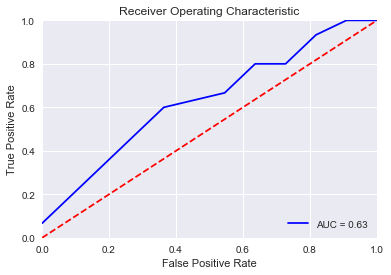

In [65]:
from sklearn import metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- for model1

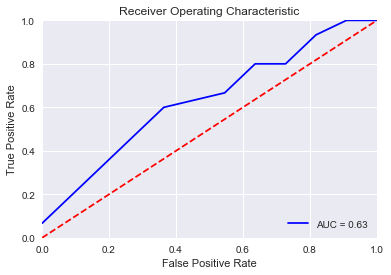

In [66]:
from sklearn import metrics
probs = model1.predict_proba(X_test)
pred = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()